# GEOTRACES 
found online from https://geotraces.webodv.awi.de/IDP2021_v2%3EGEOTRACES_IDP2021_Seawater_Discrete_Sample_Data_v2/service/DataExploration

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from cartopy import crs, feature
import numpy as np
import cmocean as cm
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.dates as mdates

In [2]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')
data = xr.open_dataset("/data1/bbeutel/LO_user/tracers/data_from_GEOTRACES_IDP2021_Seawater_Discrete_Sample_Data_v2.nc")

In [3]:
#stations with temperature and salinity data: 
st = []
for i in data.N_STATIONS:
    if np.max(data.CTDTMP_T_VALUE_SENSOR[i,:]).values > 0 :
        if np.max(data.CTDSAL_D_CONC_SENSOR[i,:]).values > 0 :
            # print(i.values)
            st = np.append(st,int(i.values))

In [6]:
# date range of data
print(np.min(data.date_time).values,'-',np.max(data.date_time).values)

2013-08-23T04:17:40.000000520 - 2018-10-14T04:01:58.999763584


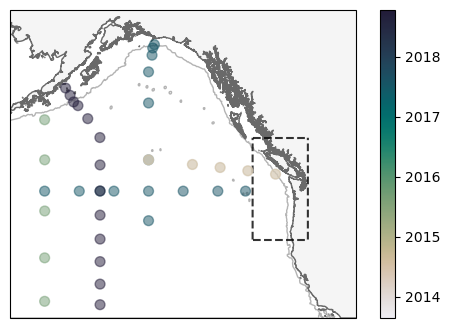

In [40]:
xlim, ylim = [-165, -115], [33, 62]
fig, ax = plt.subplots(figsize=(6, 4), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('high', edgecolor='dimgray', facecolor='whitesmoke', zorder=2))
# Draw 1000 m isobar
ax.add_feature(feature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical', edgecolor='dimgray', facecolor='white', alpha=0.5))

# Draw model box
ax.plot(grid['lon_rho'][ :,  0], grid['lat_rho'][ :,  0], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][ :, -1], grid['lat_rho'][ :, -1], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][ 0,  :], grid['lat_rho'][ 0,  :], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][-1,  :], grid['lat_rho'][-1,  :], 'k--', alpha=0.8, zorder=3, transform=crs.PlateCarree())

# color based on year
date2num = mdates.date2num(data.date_time)  # Convert datetime objects to Matplotlib's internal format
colormap = cm.cm.rain
normalize = Normalize(min(date2num), max(date2num))

sc = ax.scatter([data.longitude[int(i)]-360 for i in st],
                [data.latitude[int(i)] for i in st],
                c=[date2num[int(i)] for i in st],
                s=50,
                cmap=colormap,
                norm=normalize,
                transform=crs.PlateCarree(),
                zorder=4,
                alpha=0.5)

cbar = fig.colorbar(ScalarMappable(norm=normalize, cmap=colormap), ax=ax)
cbar.ax.yaxis.set_major_locator(mdates.AutoDateLocator())
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))
# plt.savefig("GEOTRACESmap.png")

In [41]:
# ok lets see which stations have the other variables
ox = []
phos = []
sil = []
nitra = []
nitri = []
no23 = []
Al = [] 
Ba = [] 
Cd = [] 
Co = [] 
Cu = [] 
Fe = [] 
Ga = [] 
Mn = [] 
Ni = [] 
Pb = [] 

for i in data.N_STATIONS:
    if np.max(data.OXYGEN_D_CONC_BOTTLE[i,:]).values > 0 or np.max(data.CTDOXY_D_CONC_SENSOR[i,:]).values > 0:
            ox = np.append(ox,int(i.values))
    if np.max(data.PHOSPHATE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(data.PHOSPHATE_D_CONC_PUMP[i,:]).values > 0 :
            phos = np.append(phos,int(i.values))
    if np.max(data.SILICATE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(data.SILICATE_D_CONC_PUMP[i,:]).values > 0 :
            sil = np.append(sil,int(i.values))
    if np.max(data.NITRATE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(data.NITRATE_D_CONC_PUMP[i,:]).values > 0 :
            nitra = np.append(nitra,int(i.values))
    if np.max(data.NITRITE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(data.NITRITE_D_CONC_PUMP[i,:]).values > 0 :
            nitri = np.append(nitri,int(i.values))
    if np.max(data.Al_D_CONC_BOTTLE[i,:]).values > 0:
            Al = np.append(Al,int(i.values))
    if np.max(data.Ba_D_CONC_BOTTLE[i,:]).values > 0:
            Ba = np.append(Ba,int(i.values))
    if np.max(data.Cd_D_CONC_BOTTLE[i,:]).values > 0:
            Cd = np.append(Cd,int(i.values))
    if np.max(data.Co_D_CONC_BOTTLE[i,:]).values > 0:
            Co = np.append(Co,int(i.values))
    if np.max(data.Cu_D_CONC_BOTTLE[i,:]).values > 0:
            Cu = np.append(Cu,int(i.values))
    if np.max(data.Fe_D_CONC_BOTTLE[i,:]).values > 0:
            Fe = np.append(Fe,int(i.values))
    if np.max(data.Ga_D_CONC_BOTTLE[i,:]).values > 0:
            Ga = np.append(Ga,int(i.values))
    if np.max(data.Mn_D_CONC_BOTTLE[i,:]).values > 0:
            Mn = np.append(Mn,int(i.values))
    if np.max(data.Ni_D_CONC_BOTTLE[i,:]).values > 0:
            Ni = np.append(Ni,int(i.values))
    if np.max(data.Pb_D_CONC_BOTTLE[i,:]).values > 0:
            Pb = np.append(Pb,int(i.values))


print('oxygen:',len(ox))
print('phosphate:',len(phos))
print('nitrate:',len(nitra))
print('nitrite:',len(nitri))
print('silicate:',len(sil))
print('Al:', len(Al))
print('Ba:', len(Ba))
print('Cd:', len(Cd))
print('Co:', len(Co))
print('Cu:', len(Cu))
print('Fe:', len(Fe))
print('Ga:', len(Ga))
print('Mn:', len(Mn))
print('Ni:', len(Ni))
print('Pb', len(Pb))


oxygen: 45
phosphate: 39
nitrate: 24
nitrite: 14
silicate: 39
Al: 6
Ba: 13
Cd: 14
Co: 13
Cu: 21
Fe: 21
Ga: 13
Mn: 6
Ni: 6
Pb 6
